Question 1

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
class UndirectedGraph:
  def __init__(self, numVertices=-1):
    self.maxSize = numVertices
    self.numEdges = 0
    if numVertices==-1:
      self.adjList = {}
      self.maxSize = -1
      self.numVertices = 0
    else:
      self.adjList = {}
      self.numVertices = numVertices
      for i in range(1, numVertices+1):
        self.adjList[i] = []

  def addNode(self, nodeIndex): #forgot to add negative check
    if self.maxSize != -1:
      if nodeIndex<=self.maxSize:
        self.adjList[nodeIndex] = []
      else:
        raise Exception('Node index cannot exceed number of nodes')
    else:  #free graph
      self.adjList[nodeIndex] = []
      self.numVertices += 1

  def addEdge(self, a, b):
    if a not in self.adjList.keys():
      self.addNode(a)
    if b not in self.adjList.keys():
      self.addNode(b)
    if b not in self.adjList[a]:
      self.adjList[a].append(b)
      self.adjList[b].append(a)
      self.numEdges += 1

  def __add__(self, other):
    if type(other) is int:
      self.addNode(other)
    if type(other) is tuple:
      self.addEdge(other[0], other[1])
    return self

  def __str__(self):
    outstr= f"Graph with {self.numVertices} nodes and {self.numEdges} edges. Neighbours of the nodes are belows:\n"
    for i in self.adjList.keys():
      outstr += f"Node {i}: {self.adjList[i]}\n"
    return outstr

  def plotDegDist(self):
    node_degrees = []
    for i in range(1, self.numVertices+1):
      node_degrees.append(len(self.adjList[i]))

    node_count = {}
    # for i in range(0, max(node_degrees)+1):
    for i in range(0, self.numVertices+1):
      node_count[i] = 0
    for deg in node_degrees:
      node_count[deg] += 1
    for i in node_count.keys():
      node_count[i] /= self.numVertices
    # xplots = np.arange(0, max(node_count.keys())+1, 1)
    xplots = np.arange(0, self.numVertices, 1)
    yplots = [node_count[i] for i in xplots]
    # print(xplots)
    # print(yplots)
    plt.plot(xplots, yplots, 'o', marker='.', markersize = 5)
    plt.axvline(x = sum(node_degrees)/len(node_degrees), color = 'red', label = 'axvline - full height')
    plt.show()


  def isConnected(self):
    queue = []
    visited = []
    curr_vertex = list(self.adjList.keys())[0]
    queue.append(curr_vertex)
    while(len(queue)!=0):
      curr_vertex = queue.pop(0)
      for i in self.adjList[curr_vertex]:
        if i not in visited:
          visited.append(i)
          queue.append(i)
    if(len(visited)==self.numVertices):
      return True
    else:
      return False

  def oneTwoComponentSizes(self):
    queue = []
    visited = []
    conn_component_size = []
    temp = 0
    for vert in self.adjList.keys():
      if vert not in visited:
        flag = 0
        curr_vertex = vert
        visited.append(vert)
        queue.append(curr_vertex)
        while(len(queue)!=0):
          curr_vertex = queue.pop(0)
          #visited.append(curr_vertex)
          #print(f" adj List is {self.adjList[curr_vertex]}")
          if (len(self.adjList[curr_vertex])==0):
            flag = 1
          for i in self.adjList[curr_vertex]:
            if i not in visited:
              visited.append(i)
              queue.append(i)
        temp = len(visited) - temp
        if flag ==0:
          conn_component_size.append(temp)
        else:
          conn_component_size.append(1)
    #print(conn_component_size)
    conn_component_size.sort()
    return [conn_component_size[-1], conn_component_size[-2]]

In [ ]:
g = UndirectedGraph()
g.addNode(1)
g.addNode(100)

In [ ]:
# g = UndirectedGraph(10)
# g.addNode(11)

In [ ]:
g = UndirectedGraph(10)
g.addEdge(1,2)
g.addNode(4)
g.addEdge(2,4)
print(g)

Graph with 10 nodes and 2 edges. Neighbours of the nodes are belows:
Node 1: [2]
Node 2: [1, 4]
Node 3: []
Node 4: [2]
Node 5: []
Node 6: []
Node 7: []
Node 8: []
Node 9: []
Node 10: []



In [ ]:
g = UndirectedGraph()
g = g + 10
g = g + (11, 12)
print(g)

Graph with 3 nodes and 1 edges. Neighbours of the nodes are belows:
Node 10: []
Node 11: [12]
Node 12: [11]



In [ ]:
g = UndirectedGraph(10)
g = g + (1, 2)
g = g + (3, 4)
print(g)

Graph with 10 nodes and 2 edges. Neighbours of the nodes are belows:
Node 1: [2]
Node 2: [1]
Node 3: [4]
Node 4: [3]
Node 5: []
Node 6: []
Node 7: []
Node 8: []
Node 9: []
Node 10: []



Graph with 5 nodes and 3 edges. Neighbours of the nodes are belows:
Node 1: [2, 4]
Node 2: [1]
Node 3: [4]
Node 4: [3, 1]
Node 5: []



<ipython-input-2-233276bb449b>:72: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(xplots, yplots, 'o', marker='.', markersize = 5)


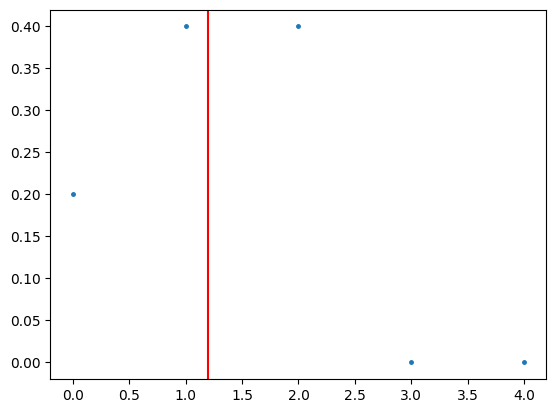

In [ ]:
g = UndirectedGraph(5)
g = g + (1, 2)
g = g + (3, 4)
g = g + (1, 4)
print(g)
g.plotDegDist()

Question 2

In [ ]:
import random

In [ ]:
class ERRandomGraph(UndirectedGraph):
  def sample(self, pr):
    for i in range(self.numVertices):
      for j in range(0, i):
        if random.choices([1, 0], weights=[pr, 1-pr], k=1)[0] == 1:
          self.addEdge(i, j)



<ipython-input-2-233276bb449b>:72: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(xplots, yplots, 'o', marker='.', markersize = 5)


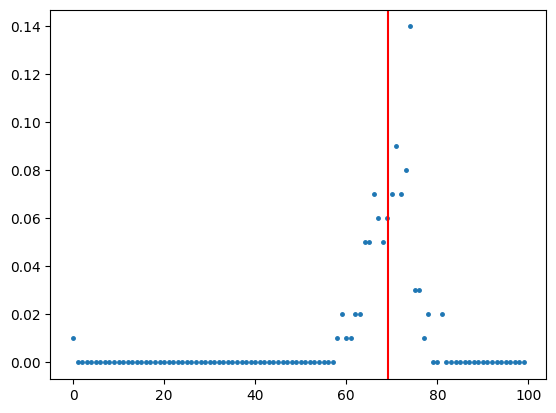

In [ ]:
g = ERRandomGraph(100)
g.sample(0.7)
g.plotDegDist()

<ipython-input-2-233276bb449b>:72: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(xplots, yplots, 'o', marker='.', markersize = 5)


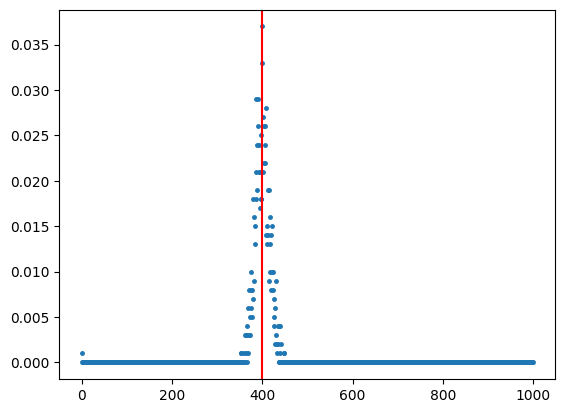

In [ ]:
g = ERRandomGraph(1000)
g.sample(0.4)
g.plotDegDist()

Question 3

In [ ]:
g = UndirectedGraph(5)
g = g + (1, 2)
g = g + (2, 3)
g = g + (3, 4)
g = g + (3, 5)
print(g.isConnected())

True


In [ ]:
g = UndirectedGraph(5)
g = g + (1, 2)
g = g + (2, 3)
g = g + (3, 5)
print(g.isConnected())
print(g)

False
Graph with 5 nodes and 3 edges. Neighbours of the nodes are belows:
Node 1: [2]
Node 2: [1, 3]
Node 3: [2, 5]
Node 4: []
Node 5: [3]



In [ ]:
p_values = np.arange(0, 0.1, 0.005)

In [ ]:
conn_fraction = []

In [ ]:
for p in p_values:
  conn_count = 0
  for i in range(1000):
    g = ERRandomGraph(100)
    g.sample(p)
    if g.isConnected():
      conn_count += 1
  conn_fraction.append(conn_count/1000)


In [ ]:
print(conn_fraction)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.011, 0.059, 0.18, 0.331, 0.522, 0.695, 0.815, 0.865, 0.922, 0.957, 0.969, 0.989, 0.99, 0.994]


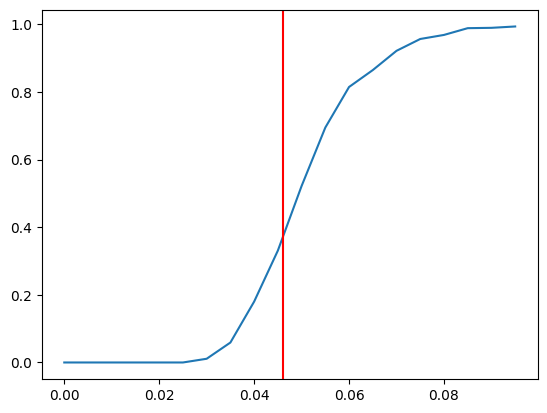

In [ ]:
plt.plot(p_values, conn_fraction)
plt.axvline(0.04605170185, color = 'red', label = 'axvline - full height')
plt.show()

Question 4

In [ ]:
g = UndirectedGraph(6)
g = g + (1, 2)
g = g + (3, 4)
g = g + (6, 4)
print(g)
print(g.oneTwoComponentSizes())

Graph with 6 nodes and 3 edges. Neighbours of the nodes are belows:
Node 1: [2]
Node 2: [1]
Node 3: [4]
Node 4: [3, 6]
Node 5: []
Node 6: [4]

[3, 2]


In [ ]:
g = ERRandomGraph(100)
g.sample(0.01)
print(g.oneTwoComponentSizes())

[49, 41]


In [ ]:
def four_b():
  steps = np.arange(0, 0.006, 0.00006)
  y_list = []
  z_list = []
  thres = 0
  for step in steps:
    y, z = 0, 0
    for i in range(50):
      g = ERRandomGraph(1000)
      g.sample(step)
      temp = g.oneTwoComponentSizes()
      if len(temp)==1:
        if thres==0:
          print('11')
          thres = step
        else:
          print('12')
          y += temp[0]
          z += 0
      else:
        y += temp[0]
        z += temp[1]
    y /= 50
    z /= 50
    y_list.append(y/1000)
    z_list.append(z/1000)

  plt.plot(steps, y_list, color='g', label='largest conn comp')
  plt.plot(steps, z_list, color='b', label='2nd largest cc')
  plt.axvline(0.001, color = 'red', label = 'axvline - full height')
  plt.axvline(thres, color = 'yellow', label = 'axvline - full height')
  plt.xlabel("p")
  plt.ylabel("fraction of nodes")
  plt.title("Fraction of nodes in the largest and second-largest connected components (CC) of G(1000, p) as function of p")

  plt.legend()
  plt.show()



In [ ]:
four_b()

KeyboardInterrupt: 

Question 5

In [ ]:
import networkx as nx


In [ ]:


class Lattice():
  def __init__(self, vert):
    self.vert = vert
    self.g = nx.grid_graph(dim=(vert, vert))
    self.long_path = []
    for i in range(vert):
      for j in range(vert):
        if ((i-1, j), (i, j)) in list(self.g.edges):   #left
          self.g.remove_edge((i-1,j),(i,j))
        if ((i, j), (i-1, j)) in list(self.g.edges):   #lefti
          self.g.remove_edge((i, j), (i-1, j))
        if ((i+1, j), (i, j)) in list(self.g.edges):   #right
          self.g.remove_edge((i+1, j), (i, j))
        if ((i, j), (i+1, j)) in list(self.g.edges):   #righti
          self.g.remove_edge((i, j), (i+1, j))
        if ((i, j-1), (i, j)) in list(self.g.edges):   #up
          self.g.remove_edge((i, j-1), (i, j))
        if ((i, j), (i, j-1)) in list(self.g.edges):   #upi
          self.g.remove_edge((i, j), (i, j-1))
        if ((i, j+1), (i, j)) in list(self.g.edges):   #down
          self.g.remove_edge((i, j+1), (i, j))
        if ((i, j), (i, j+1)) in list(self.g.edges):   #downi
          self.g.remove_edge((i, j), (i, j+1))

    # print(list(self.g.nodes))
    # print(list(self.g.edges))

  def show(self):
    x_points = [point[0] for point in list(self.g.nodes)]
    y_points = [point[1] for point in list(self.g.nodes)]
    points_1 = [edge[0] for edge in list(self.g.edges)]
    points_2 = [edge[1] for edge in list(self.g.edges)]
    # print(len(list(self.g.edges)))
    for i in range(len(points_1)):
      plt.plot((points_1[i][0], points_2[i][0]), (points_1[i][1], points_2[i][1]), markersize=2, color='r')
    long_points_1 = [edge[0] for edge in self.long_path]
    long_points_2 = [edge[1] for edge in self.long_path]
    for i in range(len(long_points_1)):
      plt.plot((long_points_1[i][0], long_points_2[i][0]), (long_points_1[i][1], long_points_2[i][1]), markersize=2, color='g')
    plt.plot(x_points, y_points, 'o', markersize=2)
    plt.show()

  def isValid(self, i, j):
    if i>-1 and i<self.vert and j>-1 and j<self.vert:
      return True
    else:
      return False

  def percolate(self, p):
    diff = [(-1, 0), (+1, 0), (0, +1), (0, -1)]
    for i in range(self.vert):
      for j in range(self.vert):
        for k in range(4):
          if random.choices([1, 0], weights=[p, 1-p], k=1)[0] == 1:
            if self.isValid(i+diff[k][0], j+diff[k][1]):
              self.g.add_edge((i, j), (i+diff[k][0], j+diff[k][1]))
              self.g.add_edge((i+diff[k][0], j+diff[k][1]), (i, j))


  def existsTopDownPath(self):
    for i in range(self.vert):
      for j in range(self.vert):
        if nx.has_path(self.g, (i,self.vert-1), (j, 0)):
          # print(f"hehe {(i,self.vert-1)} and {(j, 0)}")
          return True
    return False

  def showPaths(self):
    # print(nx.bfs_edges(self.g, (0,0)))
    #print(type(nx.shortest_path(self.g,(0,0))))
    if not self.existsTopDownPath():
      for i in range(self.vert):
        all_paths = []
        for path in list(nx.shortest_path(self.g,(i,self.vert-1)).values()):
          all_paths.append(path)
        if(len(all_paths)==0):
          continue
        long_short_path = all_paths[0]
        for path in all_paths:
          if len(path) > len(long_short_path):
            long_short_path = path
        for i in range(len(long_short_path)-1):
          self.long_path.append((long_short_path[i], long_short_path[i+1]))
    else:
      for i in range(self.vert):
        all_paths = []
        bottom_nodes = [(i,0) for i in range(self.vert)]
        for path in list(nx.shortest_path(self.g,(i,self.vert-1)).values()):
          for node in bottom_nodes:
            if node in path:
              all_paths.append(path)
              break
        if(len(all_paths)==0):
          continue
        long_short_path = all_paths[0]
        for path in all_paths:
          if len(path) > len(long_short_path):
            long_short_path = path
        for i in range(len(long_short_path)-1):
          self.long_path.append((long_short_path[i], long_short_path[i+1]))

    self.show()
    # for i in range(self.vert):
    #   for j in range(self.vert):
    #     reachable_nodes = [(i,j)]
    #     for edge in nx.bfs_edges(self, (i, j)):
    #       reachable_nodes.append(edge[1])


In [ ]:
l = Lattice(10)

[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (5, 0), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (5, 9), (6, 0), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6), (6, 7), (6, 8), (6, 9), (7, 0), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7), (7, 8), (7, 9), (8, 0), (8, 1), (8, 2), (8, 3), (8, 4), (8, 5), (8, 6), (8, 7), (8, 8), (8, 9), (9, 0), (9, 1), (9, 2), (9, 3), (9, 4), (9, 5), (9, 6), (9, 7), (9, 8), (9, 9)]
[]


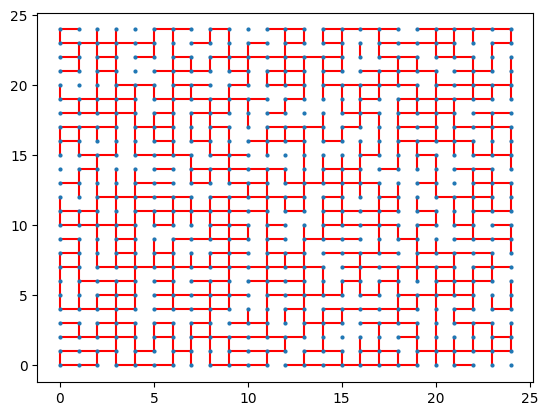

True

In [ ]:
l = Lattice(25)
l.percolate(0.4)
l.show()
l.existsTopDownPath()

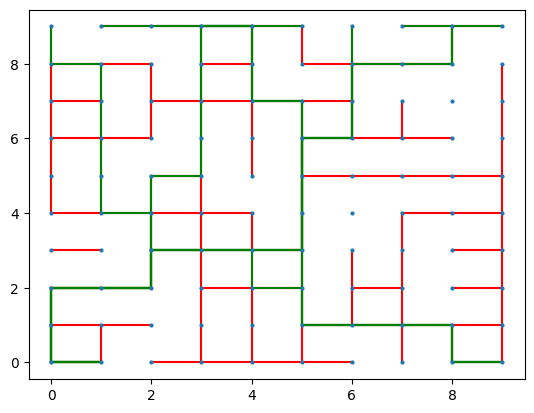

In [ ]:
l.showPaths()

Question 6

In [ ]:
x_list = np.arange(0, 1, 0.1)

In [ ]:
y_list = []

In [ ]:
for p in x_list:
  count = 0
  for i in range(50):
    l = Lattice(10)
    l.percolate(0.4)
    if l.existsTopDownPath():
      count += 1
  y_list.append(count/50)

In [ ]:
plt.plot(x_list, y_list, 'b')